Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

In [ ]:
import pandas as pd
import numpy as np

In [33]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


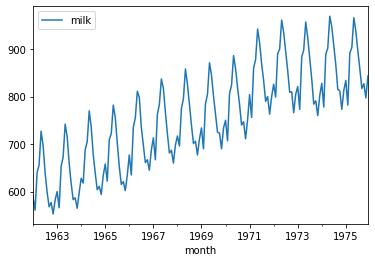

In [34]:
milk.plot()

In [35]:
milk['daily'] = milk.milk/milk.index.days_in_month
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


In [36]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)
milk['daily_diff1'].isnull().sum()

1

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

In [37]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)
milk['daily_diff12'].isnull().sum()

12

In [38]:
milk.head()

,milk,daily,daily_diff1,daily_diff12
month,,,,
1962-01-01,589,19.000000,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN
1962-03-01,640,20.645161,0.609447,NaN
1962-04-01,656,21.866667,1.221505,NaN
1962-05-01,727,23.451613,1.584946,NaN


При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

In [39]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk['daily_diff1'].dropna())[1]

/Users/andrewbelyaev/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.06430054654174037

In [40]:
sm.tsa.stattools.adfuller(milk['daily_diff12'].dropna())[1]

0.22127672658830383

In [45]:
# сезонное и обычное дифференцирование
milk['daily_diff12_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
sm.tsa.stattools.adfuller(milk['daily_diff12_1'].dropna())[1]

2.2808455518037347e-06


Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного



Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

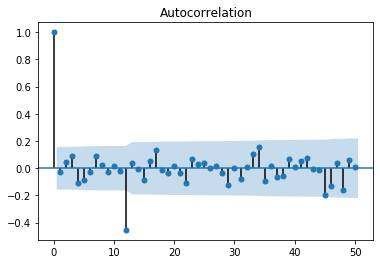

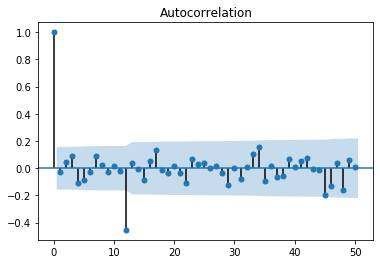

In [58]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA? 

1


Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

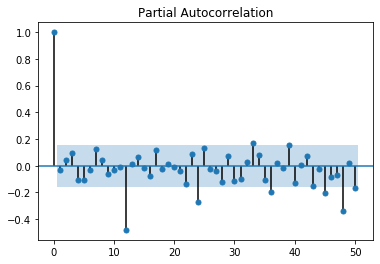

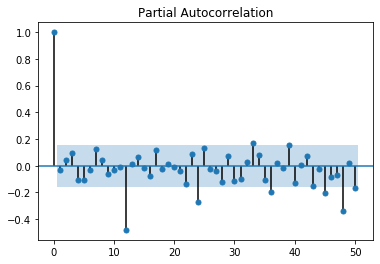

In [56]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?
0, тк p < S для избежания того чтобы было две величины y12